Matthew Grace


# What trending topics occurred at Virginia Tech over the last couple of months, and on what days did they occur?


Leveraging tweets from the Blacksburg area, can certain events be identified using trends in the tweets? These questions can be answered using text analytics. The specific method will be the use of Term Frequency Matrices and TFIDF (Term Frequency Inverse Document Frequency) Matrices. This will allow certain words to be highlighted and analysis can be conducted to determine events.

Necessary imports and setup of an initial dataframe will be done first.

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import itertools
import nltk
from datetime import datetime
from dateutil.parser import parse
from pylab import rcParams
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
tweet_data = pd.read_csv('VT_tweets_2019Fall_geo.csv')
tweet_data['bag'] = tweet_data.tweet.map(lambda b: b.strip(',.;?!:').lower().split())
tweet_data['lens'] = tweet_data.bag.map(len)


In [7]:
tweet_data = tweet_data.loc[tweet_data['tweet_type'] != 'retweet'];
tweet_data.index = range(0,len(tweet_data))
tweet_data['datetime'] = pd.to_datetime(tweet_data['datetime'])
tweet_data['date'] = tweet_data.datetime.map(lambda d: d.date())


Now that a dataframe is setup with the bag of words, a TF and TFIDF matrix can be setup.

In [8]:
g = tweet_data.groupby('date')


In [9]:
dates = g.bag.aggregate(lambda listofbags:list(itertools.chain.from_iterable(listofbags)))

In [10]:
TF = dates.apply(lambda bag: pd.Series(bag).value_counts())

In [11]:
IDF = np.log(len(TF)/TF.count())

In [12]:
TFIDF = TF*IDF

In [13]:
len(TFIDF)

62

In [14]:
TFIDF.head()

,the,a,to,i,and,is,of,in,for,you,...,@wilyxtower,https://t.co/sk57pomatq,https://t.co/lkgtjadx8a,https://t.co/dm71uck405,#leanmanufactu…https://t.co/h5pi007ucr,⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️👀👀👀👀👀👀👀👀👀👀👀👀👀#hokies,babe...,#indispensable,begotten),"regression,"
date,,,,,,,,,,,,,,,,,,,,,
2019-08-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
TFIDF.index.names = ['Date']


TFIDF Matrix has been computed, sorted by date, so that each of the tweets from the 62 days starting on August 25, 2019 have weights on the words contained in those tweets.

In [16]:
# add to list of words starting with '@', these columns will be
# removed from the dataframe
tfidf_cols = list(TFIDF.columns.values)
remove_list = []
for i in tfidf_cols:
    if i[0] == '@':
        remove_list.append(i)


In [17]:
new_TFIDF = TFIDF.drop(labels = remove_list,axis = 1)
new_TFIDF.head()

,the,a,to,i,and,is,of,in,for,you,...,selena’s,https://t.co/sk57pomatq,https://t.co/lkgtjadx8a,https://t.co/dm71uck405,#leanmanufactu…https://t.co/h5pi007ucr,⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️👀👀👀👀👀👀👀👀👀👀👀👀👀#hokies,babe...,#indispensable,begotten),"regression,"
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# list of each row entry
row_list = [new_TFIDF.iloc[i].sort_values(ascending=False)
            for i in range(0,len(new_TFIDF))]
#print(row_list[45].sort_values(ascending=False))


### Plotting
For each day, the word with the largest TFIDF value will be plotted.

In [19]:
l_dates = list(new_TFIDF.index.values)
dates = matplotlib.dates.date2num(l_dates)

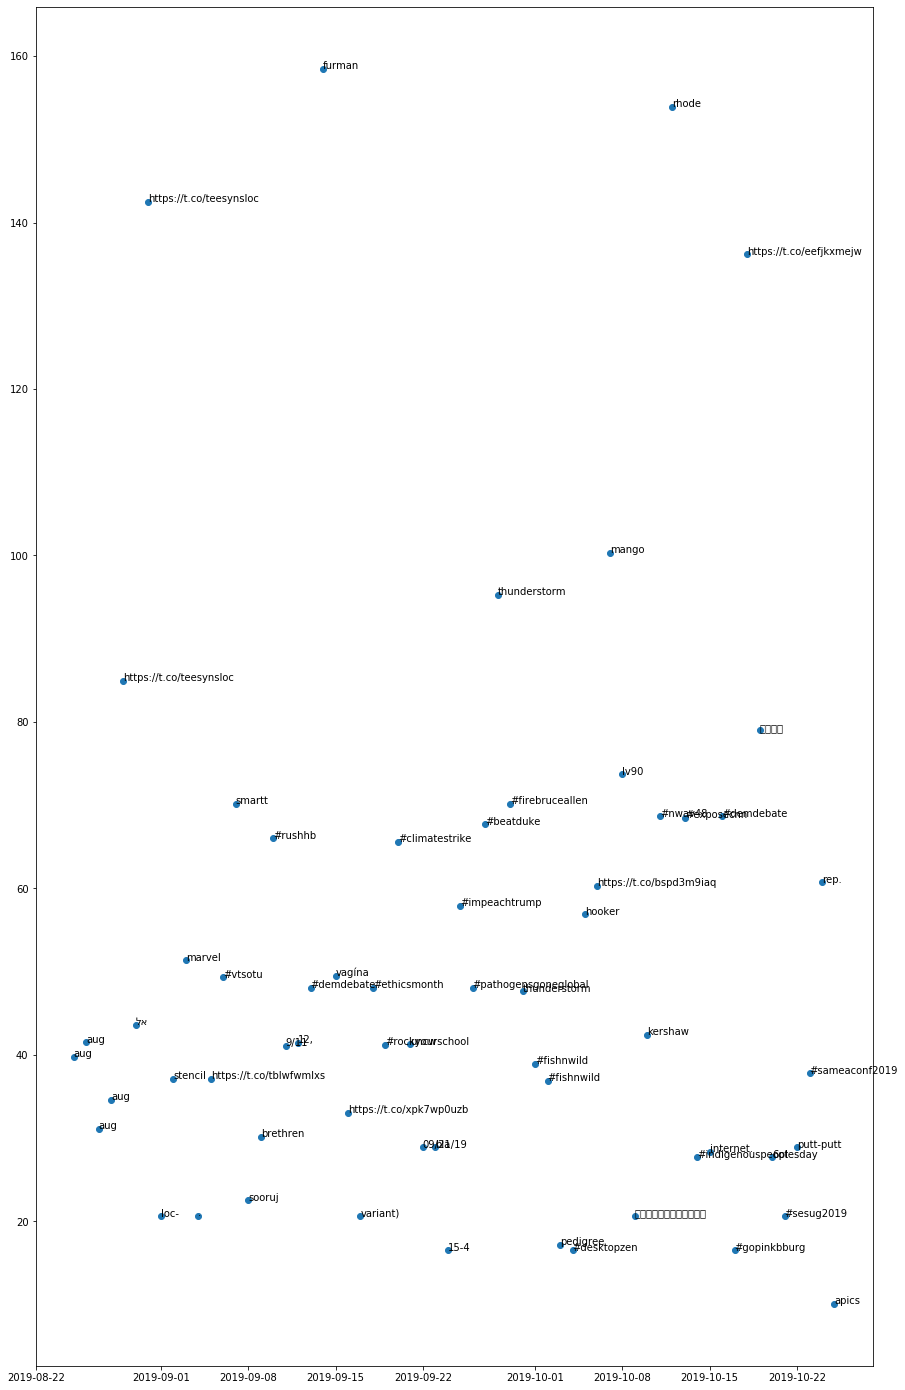

In [21]:
max_terms = [i.max() for i in row_list]
max_words = [i.idxmax() for i in row_list]

plt.plot_date(dates,max_terms)
rcParams['figure.figsize'] = 15,25;
for i in range(0,len(row_list)):
    plt.annotate(max_words[i],(dates[i],max_terms[i]));

## Initial Findings
The graph produced shows the terms with the highest TFIDF score among all tweets for each day. Immediatley events are noticeable, such as a climate strike, the Fortnite 1v100 event, and the VT vs Duke game. 

## Next Step
To find events that have occured, I will simply print out the top words from a given day. I will initially target Fridays and Saturdays as these are when many events occur.

In [22]:
#first firday index = 5, saturday = 6 (aug 30/31)
# helper function will return list of top n most unique terms on 
# the day with index ind. ind=0 represents 08/25/2019.
def top_terms(n = 5,ind =0):
    terms = list(row_list[ind].index.values)
    return terms[:n]
print(top_terms(20,12))
print(top_terms(20,13))


['#vtsotu', '#gobblerfest', '#planetaryhealth2019', 'gobblerfest', 'trubisky', '*', '💛majoring', '💜vt', '09/05/19', 'initiate', 'psp', 'aquaculture', '*.', '💜beta', 'sands:', '09/04/19', 'sophia', '.@vtsandsman', 'chronic', '#beatodu']
['smartt', 'odu', '#beatodu', '#2kday', '#norisk', 'kumah', 'dominion', 'monarchs', '#vtfanphoto', 'willis', 'grimsley', '31-17', 'yards', '#giveaway', 'odu.', 'yards,', '#odu', '10-3', '24-3', 'keshawn']


### First Event Discovered
Even as a none football fan it was easy to identify that on Septermber 7th, VT football beat ODU 31-17. Also over this same weekend, it appears that Gobblerfest took place (on the Friday, so Septermber 6th). Using my helper function, it will be easy to identify many of the events and other activities that took place in Blacksburg over the weekends (and any other day if needed). Next I will look 2 weeks ahead.


In [23]:
print(top_terms(20,19))
print(top_terms(20,20))

['#demdebate', '#g2great', 'phonics', 'poggers', 'slye', 'norv', '13,', 'sep', 'castro', 'cam', 'ru-1', 'joey', '#democraticdebate', 'panthers', 'newton', '#keeppounding', '#fridaythe13th', 'tazewell', '#archives', 'goal!']
['furman', 'loc:', 'ww?', 'wishlist', 'paladins', 'want:', '#firejustinfuente', 'wtt/wts', 'album:', 'group:', 'have:', '$7', '14-3', '14,', 'keshawn', 'ru-1', 'willis', 'thunderstorm', '#beatfurman', 'grainger']


Again events are immediately noticeable. On Sepetermber 13th, a Friday, it was Friday the 13th. Also, someone still had thoughts on the Democratic Debate that had taken place the night before. The following day on September 14th, VT defeated Furman in football. Justin Fuente was a hot topic of discussion as he narrowly pulled out defeat over the much worse opponent.